# Scikit Learn

Scikit Learn have a lot of features and all kinds of API's to explore data and do data science with

It is one of the top data science package out there

- It provides simple and efficient tool for data mining and data analysis

- It is build on numpy, scipy and matplotlib

- Open source, commercially usable - BSD license    (Berkeley Source Distribution (BSD))

What we can achieve using scikit - learn

- Classification - Identifying which category an object belong to.    
                 Application: Spam detection             (Yes or No)
                 Or in banking if it is a good loan or a bad loan
                 (whether a wine is good or bad)
    
- Regression - Predicting an attribute associated with an object.
             Application: Stock prices prediction, weather prediction models
             (in many cases this is more useful because we are looking for an actual value)
             
             
             
- Clustering - Automatic grouping of similar objects into sets.
             Application: Customer segmentation (Like in Amazon site we see if one customer likes one thing they will like this thing also)
             
             
- Model Selection - Comparing, validating and choosing parameters and models
                  Application: Improving model accuracy via parameter tuning
                  
                  
- Dimensionality reducation - Reducing the number of random variables to consider
                            Application: To increase model efficiency
                      (For example sometimes we may have a thousands of features (attributes or columns of the dataset), so some of them may be duplicated, or some attributes we can combine together, so by reducing all those features into smaller amounts, we can improve the efficiency of the models, it can process faster, 
                      so it would also be less biased, because if we are weighing it over and over again with the same feature, this will give results biased to that feature. So we don't need to be biased so we try to reduce the dimentions as much as possible for better analysis.)
                            
- Pre processing - Feature extraction and normalization
                 Application: Transforming input data such as text for use with machine learning algorithms. 

In [81]:
# Importing required packages

import pandas as pd
import seaborn as sns

# seaborn sits on top of matplot library and it have so many other added features
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC            # Support Vector Classifier 
from sklearn import svm  # svm - support vector model
from sklearn.neural_network import MLPClassifier # we will look for these three different classifiers


# from sklearn.linear_model import SGDClassifier

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder


# standard scaler is the most common used preprocessor
from sklearn.model_selection import train_test_split
# for splitting data in different sections

In [3]:
wine = pd.read_csv("winequality-red.csv", sep =";")

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
# so clearly here we do not have any null values

In [10]:
wine.shape

(1599, 12)

In [11]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [14]:
# preprocessing data (using pd.cut to cut the data into two bins)

bins = (2,6.5,8)
group_names = ["bad", "good"]
wine["quality"] = pd.cut(wine['quality'], bins = bins , labels = group_names)

In [15]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [17]:
wine["quality"].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

(array([1382.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         217.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

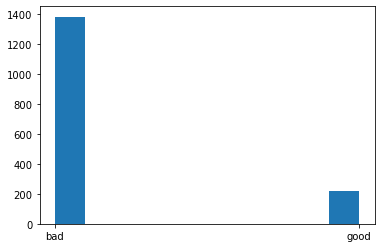

In [19]:
plt.hist(wine["quality"])

In [28]:
# we use sklearn preprocessing feature LabelEncoder     (to make bad as 0 and good as 1)
label_quality = LabelEncoder()

# this is required to change the quality attribute to numeric values from 0 to 1, 

# so that there can be comparison within it

In [29]:
wine["quality"] = label_quality.fit_transform(wine["quality"])

In [30]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [31]:
wine['quality'].unique()

array([0, 1])

In [32]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

(array([1382.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         217.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

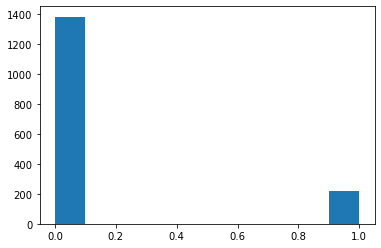

In [38]:
plt.hist(wine['quality'])

/Users/rajatchauhan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

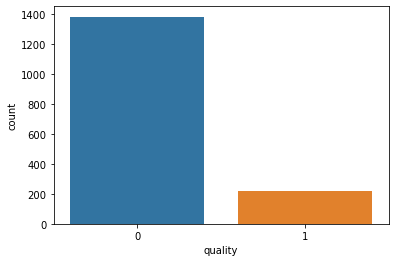

In [35]:
# bar graph using seaborn
sns.countplot(wine['quality'])

In [48]:
# Seperating the dataset as response variable and feature variables


# making a dataframe X for all the table dropping the quality column

X = wine.drop('quality', axis = 1)


# so these are the features that we will use to predict the quality of the wine

In [49]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [42]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [43]:
# taking only the quality column

y = wine['quality']
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [47]:
y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [50]:
# next step to check how good our model is

# train and test splitting of data

# we will use the model_selection module

# from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42 )


# random_state to define that we are randomly seperating values so that we get good data to train our models.

# any kind of biases we need to avoid.

# so here we are doing nothing just randomly splitting values 
# to train our model and second 20 percentage data we will use to test the same model. (how close it predicts)

# so here we will see the effect of other attributes to the attribute quality.

In [51]:
X_train  # this data we will use to train models

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4
705,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9
...,...,...,...,...,...,...,...,...,...,...,...
1130,9.1,0.600,0.00,1.9,0.058,5.0,10.0,0.99770,3.18,0.63,10.4
1294,8.2,0.635,0.10,2.1,0.073,25.0,60.0,0.99638,3.29,0.75,10.9
860,7.2,0.620,0.06,2.7,0.077,15.0,85.0,0.99746,3.51,0.54,9.5
1459,7.9,0.200,0.35,1.7,0.054,7.0,15.0,0.99458,3.32,0.80,11.9


In [52]:
X_test  # this 20 percentage data we will use to test the precision of our models

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
803,7.7,0.560,0.08,2.50,0.114,14.0,46.0,0.99710,3.24,0.66,9.6
124,7.8,0.500,0.17,1.60,0.082,21.0,102.0,0.99600,3.39,0.48,9.5
350,10.7,0.670,0.22,2.70,0.107,17.0,34.0,1.00040,3.28,0.98,9.9
682,8.5,0.460,0.31,2.25,0.078,32.0,58.0,0.99800,3.33,0.54,9.8
1326,6.7,0.460,0.24,1.70,0.077,18.0,34.0,0.99480,3.39,0.60,10.6
...,...,...,...,...,...,...,...,...,...,...,...
1259,6.8,0.640,0.00,2.70,0.123,15.0,33.0,0.99538,3.44,0.63,11.3
1295,6.6,0.630,0.00,4.30,0.093,51.0,77.5,0.99558,3.20,0.45,9.5
1155,8.3,0.600,0.25,2.20,0.118,9.0,38.0,0.99616,3.15,0.53,9.8
963,8.8,0.270,0.39,2.00,0.100,20.0,27.0,0.99546,3.15,0.69,11.2


In [53]:
y_train # this is the prediction values we are using to train our models

493     0
354     0
342     0
834     0
705     0
       ..
1130    0
1294    0
860     0
1459    1
1126    0
Name: quality, Length: 1279, dtype: int64

In [54]:
y_test    # this is the prediction attribute out of which we will use to test our model.

803     0
124     0
350     0
682     0
1326    0
       ..
1259    0
1295    0
1155    0
963     0
704     0
Name: quality, Length: 320, dtype: int64

In [55]:
# Applying standard scaling to get optimised results

sc = StandardScaler()

In [57]:
# Scaling is very important to know as it is required to level up the playing field, 

# so that analysis do not become biased to the attribute having higher values

# we can see some columns have values very high values such as total sulfur dioxide values (big values from 10 to 100 + )

# and some have lesser values such as citric acid, values are in points 0 to 1

In [58]:
# using the same fit for training and test

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [63]:
X_train  

# here we can see we have scaled them to same scale (between some numbers -2 to 3 something like that)

# so the attributes are now within the same scale

array([[ 0.21833164,  0.88971201,  0.19209222, ...,  1.09349989,
         0.45822284,  1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, ..., -0.40043872,
        -0.40119696,  1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, ..., -0.07566946,
         0.51551749, -0.58738978],
       ...,
       [-0.65195559,  0.49909822, -1.08752211, ...,  1.28836145,
        -0.68767023, -0.87248428],
       [-0.24582155, -1.84458448,  0.39683051, ...,  0.05423824,
         0.80199076,  1.40827174],
       [-1.46422367, -1.34236676, -0.06383064, ...,  0.50891521,
        -0.68767023,  2.92877575]])

In [64]:
X_test # is also in the same scale

array([[-3.61859850e-01,  1.64286407e-01, -9.85152962e-01, ...,
        -4.65392578e-01, -1.34389336e-04, -7.77452782e-01],
       [-3.03840702e-01, -1.70525408e-01, -5.24491803e-01, ...,
         5.08915214e-01, -1.03143815e+00, -8.72484283e-01],
       [ 1.37871461e+00,  7.78108067e-01, -2.68568937e-01, ...,
        -2.05577167e-01,  1.83329452e+00, -4.92358280e-01],
       ...,
       [-1.37449586e-02,  3.87494284e-01, -1.15015218e-01, ...,
        -1.04997725e+00, -7.44964886e-01, -5.87389780e-01],
       [ 2.76350785e-01, -1.45397070e+00,  6.01568807e-01, ...,
        -1.04997725e+00,  1.71749571e-01,  7.43051230e-01],
       [ 4.50408230e-01,  1.30822677e+00, -1.18989125e+00, ...,
        -1.40623314e-01, -6.87670232e-01, -6.82421281e-01]])

We will Cover three types of Classifiers

# Random Forest Classifier

In [65]:

# it is used for medium sized datasets


rfc = RandomForestClassifier(n_estimators = 200)

# 200 different trees it is going to build

rfc.fit(X_train, y_train)


# here X_train and y_train are the pair values that the random forest classifier 

# will take as an input data to train its model

# using this knowledge it will predict the quality values (Y values) for the X_test data


pred_rfc = rfc.predict(X_test)

pred_rfc[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [67]:
# let's see how well our model performed

#(Comparing the quality values initially available to the quality values predicted)

# here y_test is the quality values and pred_rfc are the corresponding predictions, we can see how well our model performed

# we use sklearn metrics for this that is: from sklearn.metrics import confusion_matrix, classification_report

# classification_report(original value, predicted value)

print(classification_report(y_test, pred_rfc))

print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.74      0.53      0.62        47

    accuracy                           0.90       320
   macro avg       0.83      0.75      0.78       320
weighted avg       0.90      0.90      0.90       320

[[264   9]
 [ 22  25]]


here we can see out of total 320 predictions, Bad quality wines were 273 out of which 264 were predicted correctly and
out of 47 good quality wines only 22 were predicted correctly.

# SVM Classifier

In [68]:
# SVM works better on smaller amounts of data 

clf = svm.SVC()

clf.fit(X_train, y_train)

pred_clf = clf.predict(X_test)

In [69]:
# let's see how well this model performed

print(classification_report(y_test, pred_clf))

print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

[[268   5]
 [ 35  12]]


# Neural Network

Used in Deep learning

In [73]:
# Can look into huge amounts of data

# good for text analysis, if it is time sensitive, more and more we have order of text

# good for predicting stock prices when we have a lot of data to pull in

# picture processing 

mlpc = MLPClassifier(hidden_layer_sizes = (11,11,11), max_iter = 500)


mlpc.fit(X_train, y_train)

pred_mlpc = mlpc.predict(X_test)

/Users/rajatchauhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [74]:
# let's see how well this model performed

print(classification_report(y_test, pred_mlpc))

print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       273
           1       0.53      0.49      0.51        47

    accuracy                           0.86       320
   macro avg       0.72      0.71      0.72       320
weighted avg       0.86      0.86      0.86       320

[[253  20]
 [ 24  23]]


In [75]:
# So its good practise to give one particular score at the end

from sklearn.metrics import accuracy_score

cm = accuracy_score(y_test, pred_rfc) # we are using rfc that is random forest classfier which is giving the best precision

cm

0.903125

So this is the precision on this model

In [77]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


now we will use the random forest classifier to predict the quality

In [79]:
y_new = rfc.predict(X_new)

y_new

array([0])

So prediction is that this wine is a bad wine